In [1]:
import urllib.request as urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup #beautifulsoup4 
from pprint import pprint
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords as sw
from sklearn.model_selection import train_test_split
import string
from pprint import pprint
import re

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [3]:
df = pd.read_csv('frnds.csv')
#df=df[df.Char!='Monica'][df.Char!='Phoebe'][df.Char!='Chandler']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27333 entries, 0 to 27332
Data columns (total 3 columns):
Char    27333 non-null object
Diag    27333 non-null object
wlen    27333 non-null int64
dtypes: int64(1), object(2)
memory usage: 640.7+ KB


In [5]:
def countsw(text):
    count=0
    for i in text.split():
        if i in (sw.words('english')):
            count+=1
    return count

In [7]:
pprint(df.sample(20))
print(df.groupby(df.Char).wlen.mean())
# df['sw']=df.Diag.apply(countsw)


           Char                                               Diag  wlen
9680   Chandler                 You are such a mystery to me.\n\n      7
16810      Joey   All right. Hey, but it better make me look re...    24
3100   Chandler                 What are you crazy? That's a baby!     7
7790   Chandler  \n\nWhy? Wh- wh- why is Mr. Douglas looking fo...    10
11424    Rachel   O-kay!! See what you did, I’m gonna be doing ...    14
11226    Phoebe              All right. Did everyone get out okay?     7
21954      Joey   It’s kind of embarrassing, y’know. I mean, I ...    24
4637     Monica                                    You're welcome.     2
12518      Joey   No-no-no, I think I’m gonna see how things go...    14
7244     Rachel                               \n\nTwo, two babies?     3
18594    Phoebe   Okay, well I think that they're in my purse. ...    20
21253  Chandler   Now remember when you were going out with\n\n...    31
12272    Monica   So, did you play in college? (She

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords as sw

In [10]:
translator = str.maketrans('', '', string.punctuation)

In [11]:
def clean(text): 
    #text_0 = text.translate(translator) 
    #print('t0',text)
    text_1 = ' '.join([w.lower() for w in text.split() ])
    #text_1 = ' '.join([w.lower() for w in text.split() if w not in set(sw.words('english'))])
    #print('t1',text_1)
    text_2 = re.sub('\(\w.*?\)','',text_1)
    #print('t2',text_2)
    text_3 = ' '.join([lem.lemmatize(w) for w in text_2.split()])
    #print('t3',text_3)
    return (text_3)

In [12]:
textFeatures = df['Diag'].apply(clean)

In [13]:
textFeatures2 = df['Diag']
print(textFeatures)

0        there's nothing to tell! he's just some guy i ...
1        c'mon, you're going out with the guy! there's ...
2        all right joey, be nice. so doe he have a hump...
3                                  wait, doe he eat chalk?
4        just, 'cause, i don't want her to go through w...
5        okay, everybody relax. this is not even a date...
6                                 sound like a date to me.
7        alright, so i'm back in high school, i'm stand...
8        then i look down, and i realize there's a phon...
9                                           instead of...?
10                                           that's right.
11                                   never had that dream.
12       all of a sudden, the phone start to ring. now ...
13                and they weren't looking at you before?!
14       finally, i figure i'd better answer it, and it...
15                                                     hi.
16                this guy say hello, i wanna kill mysel

In [14]:
# d=dict(zip(textFeatures,textFeatures2))
# print(pd.DataFrame({'1':textFeatures,'2':textFeatures2}))


In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
features = vectorizer.fit_transform(textFeatures)


In [16]:
features

<27333x97964 sparse matrix of type '<class 'numpy.float64'>'
	with 525345 stored elements in Compressed Sparse Row format>

In [17]:
model = LogisticRegression()
# model = RandomForestClassifier()

In [18]:
x=(features)
y=np.asarray(df.Char)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state =2703 )
# x_train=x_test
# y_train= y_test



In [20]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
list(zip(y_test,(model.predict(x_test)),(model.predict_proba(x_test)).tolist()))
# print(len((model.predict_proba(x_test))),len(y_test))


d:\ml\test-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ml\test-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[('Phoebe',
  'Phoebe',
  [0.11863501240362688,
   0.1466652271472043,
   0.1658276702860567,
   0.22092012334921443,
   0.19014591289826388,
   0.15780605391563376]),
 ('Joey',
  'Chandler',
  [0.30505913465767004,
   0.17593478227709253,
   0.17214301889338418,
   0.14231851620673105,
   0.07330373702702056,
   0.13124081093810186]),
 ('Rachel',
  'Monica',
  [0.22669393765885557,
   0.1118564779958078,
   0.23271355162157625,
   0.21446759915273164,
   0.10879909255500293,
   0.10546934101602581]),
 ('Joey',
  'Joey',
  [0.13978118428832842,
   0.34752740434985363,
   0.060157524255698286,
   0.10541369844410428,
   0.16380863882097332,
   0.18331154984104203]),
 ('Joey',
  'Ross',
  [0.12343978311915789,
   0.2035279018459033,
   0.0899212683778534,
   0.1286901951371535,
   0.19568268335027328,
   0.25873816816965867]),
 ('Monica',
  'Joey',
  [0.15517362385172978,
   0.25651448092967016,
   0.219585020435108,
   0.06654931291886289,
   0.24316212484968144,
   0.059015437014947755

In [21]:
accuracy_score(y_test,prediction)

0.3241265776477044

5467 5467


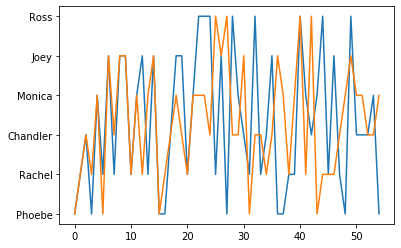

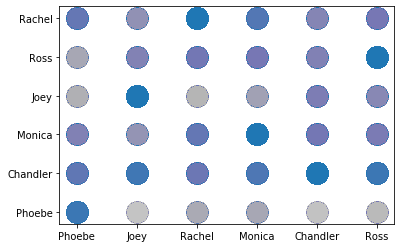

In [31]:
print(len(prediction),len(y_test))
plt.plot(y_test[::100])

plt.plot(prediction[::100])
plt.show()
plt.scatter(y_test,prediction,s=500,alpha=0.002)


In [23]:
# print(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    Chandler       0.28      0.37      0.32       916
        Joey       0.36      0.32      0.34       870
      Monica       0.30      0.30      0.30       948
      Phoebe       0.35      0.24      0.29       802
      Rachel       0.35      0.38      0.36       971
        Ross       0.33      0.32      0.33       960

    accuracy                           0.32      5467
   macro avg       0.33      0.32      0.32      5467
weighted avg       0.33      0.32      0.32      5467



In [24]:
confusion_matrix(y_test, prediction)

array([[338, 130, 139,  61, 122, 126],
       [191, 278, 107,  59, 110, 125],
       [177,  94, 281,  88, 172, 136],
       [159,  79, 126, 196, 154,  88],
       [147,  74, 155,  85, 370, 140],
       [195, 119, 132,  69, 136, 309]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

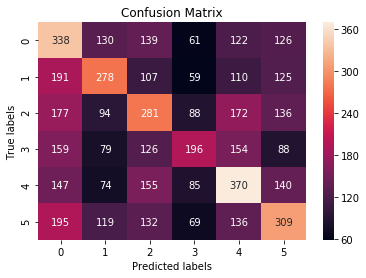

In [25]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, ax = ax, fmt='g');#annot=True to annotate cells

# Labels, Title and Ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [26]:
prediction

array(['Phoebe', 'Chandler', 'Monica', ..., 'Joey', 'Joey', 'Phoebe'],
      dtype=object)

In [27]:
y_test

array(['Phoebe', 'Joey', 'Rachel', ..., 'Joey', 'Phoebe', 'Monica'],
      dtype=object)

In [28]:
vectorizer.vocabulary_

{'there': 80993,
 'nothing': 54826,
 'to': 83675,
 'tell': 77170,
 'he': 32591,
 'just': 40810,
 'some': 72628,
 'guy': 30449,
 'work': 94504,
 'with': 93649,
 'there nothing': 81163,
 'nothing to': 54899,
 'to tell': 84413,
 'tell he': 77186,
 'he just': 32794,
 'just some': 41333,
 'some guy': 72727,
 'guy work': 30734,
 'work with': 94607,
 'mon': 50099,
 'you': 96206,
 're': 64560,
 'going': 28669,
 'out': 59320,
 'the': 78583,
 'gotta': 29616,
 'be': 7461,
 'something': 73068,
 'wrong': 95221,
 'him': 34760,
 'mon you': 50179,
 'you re': 96865,
 're going': 64744,
 'going out': 28717,
 'out with': 59533,
 'with the': 94000,
 'the guy': 79330,
 'guy there': 30688,
 'there gotta': 81087,
 'gotta be': 29621,
 'be something': 7902,
 'something wrong': 73234,
 'wrong with': 95269,
 'with him': 93801,
 'all': 2075,
 'right': 66536,
 'joey': 40279,
 'nice': 53173,
 'so': 72066,
 'doe': 19671,
 'have': 31956,
 'hump': 36505,
 'and': 3310,
 'hairpiece': 31277,
 'all right': 2273,
 'right j